In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from multiprocessing import Pool

In [28]:
img_path = '/data/ishan/Raw_Datasets_Segmentation/SHHQ/images'
mask_path = '/data/ishan/Raw_Datasets_Segmentation/SHHQ/masks'
standardized_mask_path = '/data/ishan/Raw_Datasets_Segmentation/SHHQ/standardized_masks'
img_file_names = sorted([f for f in os.listdir(img_path)])
mask_file_names = sorted([f for f in os.listdir(mask_path)])
standardized_mask_file_names = sorted([f for f in os.listdir(standardized_mask_path)])

img_files = [os.path.join(img_path, file_name) for file_name in img_file_names]
mask_files = [os.path.join(mask_path, file_name) for file_name in mask_file_names]
standardized_mask_files = [os.path.join(standardized_mask_path, file_name) for file_name in standardized_mask_file_names]


In [29]:
labels_found = []
labels_dict = {}

In [4]:
# for a in range(len(img_files[:100])):
# counter = 0
# a = 0
# while len(labels_dict[255]) >= 1:
# # for a in range(len(img_files[:100])):
#     mask = cv2.imread(mask_files[a], cv2.IMREAD_GRAYSCALE)
#     unique_labels = np.unique(mask)
#     for label in unique_labels:
#         if label not in labels_found:
#             labels_found.append(label)
#             labels_dict[label] = []
#         labels_dict[label].append(a)
#     if counter % 100 == 0:
#         print(counter)
#     a += 1
#     counter += 1

In [30]:
standardized_mask_files[7]

'/data/ishan/Raw_Datasets_Segmentation/SHHQ/standardized_masks/image_000080_mask.png'

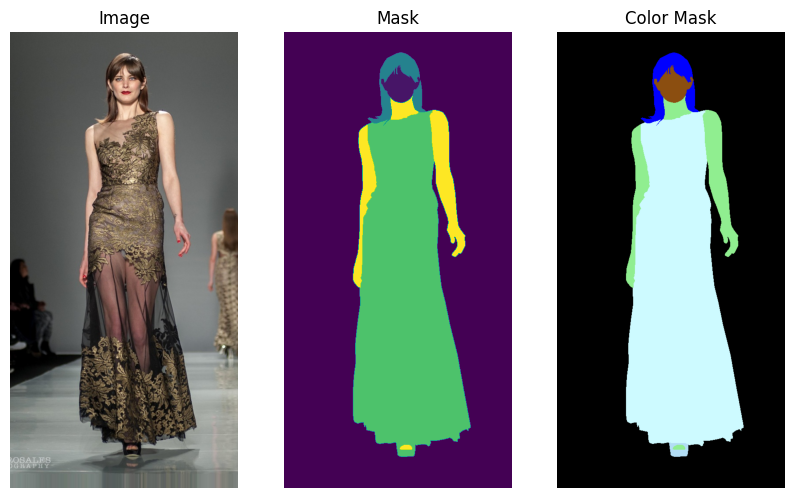

[  0  66  76 199 223 246]
0


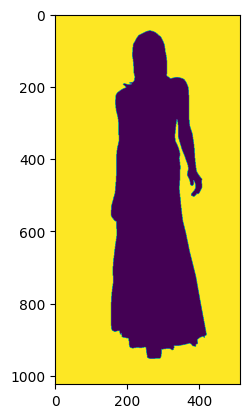

1


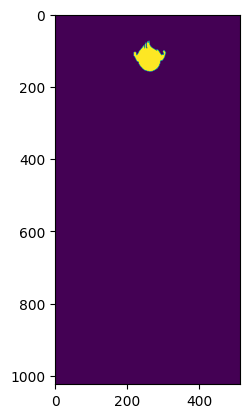

8


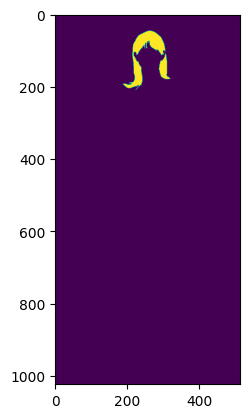

13


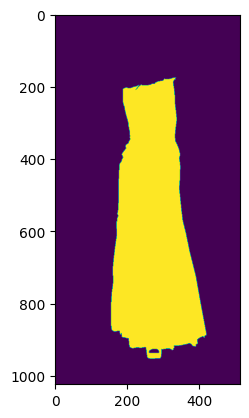

18


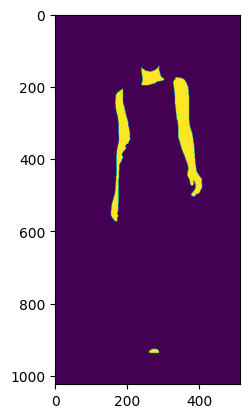

In [74]:
a = 8767
# img_files[a], mask_files[a]

img = cv2.imread(img_files[a])
mask = cv2.imread(mask_files[a], cv2.IMREAD_GRAYSCALE)
std_mask = cv2.imread(standardized_mask_files[a], cv2.IMREAD_GRAYSCALE)
mask_color = cv2.imread(mask_files[a])
fig, axs = plt.subplots(1,3, figsize=(10,10))
# Display the first image in the first subplot
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title("Image")

# Display the second image in the second subplot
axs[1].imshow(std_mask)
axs[1].set_title("Mask")

axs[2].imshow(mask_color)
axs[2].set_title("Color Mask")

# Remove the axis labels
for ax in axs:
    ax.axis("off")
plt.show()

print(np.unique(mask))
for i in np.unique(std_mask):
    image_array_test = std_mask.copy()
    image_array_test_mono = np.where(image_array_test == i,1,0)
    print(i)
    plt.imshow(image_array_test_mono, cmap='viridis')
    plt.show()

[ 0  1  8 13 17 18]


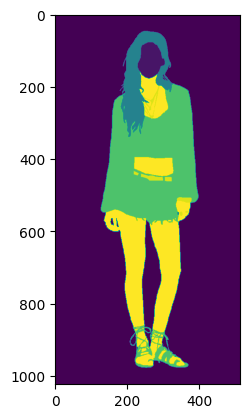

In [75]:
standardized_mask_samplpe= cv2.imread('/data/ishan/Raw_Datasets_Segmentation/SHHQ/standardized_masks/image_000006_mask.png', cv2.IMREAD_GRAYSCALE)
print(np.unique(standardized_mask_samplpe))
plt.imshow(standardized_mask_samplpe, cmap='viridis')

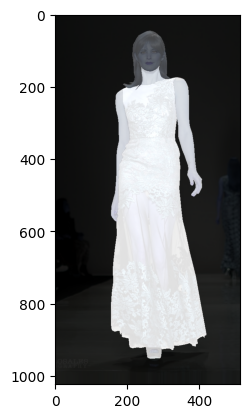

In [76]:
# Define colors for each label in the mask
colors = [
    (255, 0, 0),   # Label 1 color (blue)
    (0, 255, 0),   # Label 2 color (green)
    (0, 0, 255)    # Label 3 color (red)
]

# Apply color mapping to the mask
colored_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
colored_mask = cv2.bitwise_and(colored_mask, colored_mask, mask=mask)

# Overlay the colored mask on top of the image
result = cv2.addWeighted(img, 0.2, colored_mask, 0.9, 0)
plt.imshow(result)

In [77]:
np.unique(std_mask)

array([ 0,  1,  8, 13, 18], dtype=uint8)

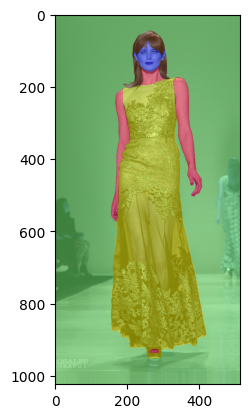

In [78]:
part_colors = [[125, 255, 125], [215, 50, 50], 
               [255, 65, 225],[0, 140, 255],
               [0, 252, 124],[167, 108, 188], 
               [66, 71, 147], [170, 255, 0],
               [19, 69, 139], [0, 255, 170],
               [0, 0, 255], [85, 219, 236], 
               [170, 0, 255], [0, 255, 255], [0, 170, 255],
               [0, 255, 255], [0, 255, 85], [0, 255, 170],
               [20, 20, 255], [0, 85, 255], [0, 170, 255],
               [0, 255, 255], [0, 255, 255], [0, 255, 255]]

im = img
vis_im = im.copy().astype(np.uint8)
vis_parsing_anno = std_mask.copy().astype(np.uint8)
vis_parsing_anno_color = np.zeros((vis_parsing_anno.shape[0], vis_parsing_anno.shape[1], 3)) + 255

num_of_class = np.max(vis_parsing_anno)

for pi in range(0, num_of_class + 1):
    index = np.where(vis_parsing_anno == pi)
    vis_parsing_anno_color[index[0], index[1], :] = part_colors[pi]

vis_parsing_anno_color = vis_parsing_anno_color.astype(np.uint8)
vis_im = cv2.addWeighted(cv2.cvtColor(vis_im, cv2.COLOR_RGB2BGR), 0.5, vis_parsing_anno_color, 0.5, 0)
plt.imshow(cv2.cvtColor(vis_im, cv2.COLOR_RGB2BGR))

In [79]:
cv2.imwrite('sample_3.png', vis_im)

True